<h1 align="center"> Mitigating Bias in AI-Based Fraud Detection </h1>

<h2> PROBLEM STATEMENT </h2>
The goal of this project is to develop an AI-based credit card fraud detection system that is ethical and unbiased. We aim to identify and mitigate biases in the data and models, ensure transparency in decision-making processes, and implement robust privacy measures to protect user data. Ultimately, the objective is to create a system that is fair, transparent, and respects user privacy while maintaining high accuracy in detecting fraudulent transactions.

<h2> Introduction </h2>
In this project, we will explore various predictive models to evaluate their accuracy in distinguishing between normal transactions and fraudulent ones. Although the dataset's features are scaled and anonymized for privacy reasons, we can still perform meaningful analyses of its key aspects. Let's dive in!

<h2> Outline: </h2>
I. <b>Initial Data Insights</b><br>
a) Get a Basic Understanding of the Data<br><br>

II. <b>Preprocessing</b><br>
a) [Scaling and Distributing](#distributing)<br>
b) [Splitting the Data](#splitting)<br>

III. <b>Mitigating Bias [Random UnderSampling and Oversampling]</b><br>
a) [Distributing and Correlating](#correlating)<br>
b) [Anomaly Detection](#anomaly)<br>
c) [Dimensionality Reduction and Clustering (t-SNE)](#clustering)<br>
d) [Classifiers](#classifiers)<br>
e) [A Deeper Look into Logistic Regression](#logistic)<br>
f) [Oversampling with SMOTE](#smote)<br>

IV. <b>Testing</b><br>
a) [Testing with Logistic Regression](#testing_logistic)<br>
b) [Neural Networks Testing (Undersampling vs Oversampling)](#neural_networks)

## I. Initial Data Insights
<a id="gather"></a>
First, let's gain a basic understanding of our dataset. Apart from the <b>transaction</b> and <b>amount</b> columns, the identities of the other columns are unknown due to privacy reasons. We do know, however, that these unnamed columns have been scaled.

<h3> Summary: </h3>
<ul>
<li>The transaction amounts are relatively <b>small</b>, with an average of approximately USD 88.</li>
<li>There are no <b>"Null"</b> values, eliminating the need for any missing value replacements.</li>
<li>The vast majority of transactions were <b>Non-Fraudulent</b> (99.83%), while <b>Fraudulent</b> transactions accounted for just 0.17% of the dataset.</li>
</ul>

<h3> Feature Details: </h3>
<ul>
<li> <b>PCA Transformation:</b> The dataset description indicates that all features, except for time and amount, have undergone PCA transformation, which is a dimensionality reduction technique.</li>
<li> <b>Scaling:</b> For PCA transformation to be applied, the features must be scaled beforehand. It is assumed that all the 'V' features have been scaled by the dataset creators.</li>
</ul>

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/preethambingi/Documents/Summer Semester 2024/Ethics and Bias in AI/ Mitigating Bias in AI-Based Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check for null values
df.isnull().sum().max()

0

In [5]:
# Columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# The class distribution is highly imbalanced, and we will need to address this problem later.
print('Non-Fraudulent Transactions:', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Fraudulent Transactions:', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

Non-Fraudulent Transactions: 99.83 % of the dataset
Fraudulent Transactions: 0.17 % of the dataset


**Note:** Notice how imbalanced our original dataset is! The majority of transactions are non-fraudulent. If we use this imbalanced dataframe as the basis for our predictive models and analysis, we risk generating a significant number of errors and causing our algorithms to overfit. This overfitting occurs because the model might "assume" most transactions are non-fraudulent, thereby failing to accurately detect fraudulent activities. To address this, we must ensure our model is trained to recognize patterns indicative of fraud. This approach not only improves accuracy but also upholds ethical standards by preventing biased outcomes. A balanced model is crucial for fair and reliable fraud detection, ensuring all transactions are evaluated equitably without prejudice or assumption.

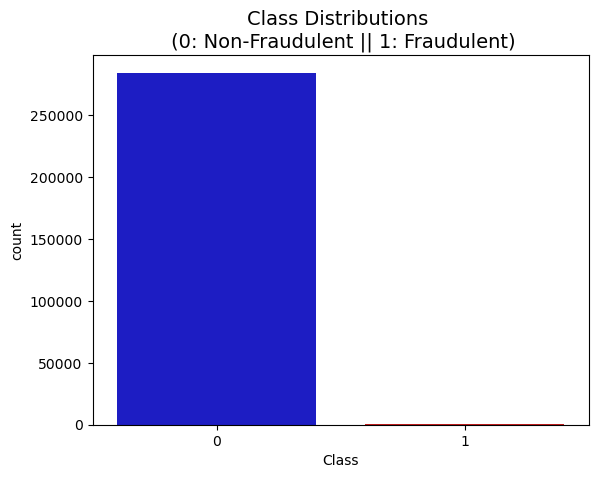

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: Non-Fraudulent || 1: Fraudulent)', fontsize=14)
plt.show()

**Distributions:** Examining these distributions provides insight into how skewed the features are. We can also analyze the distributions of other features. Techniques to address skewness and make the distributions more balanced will be applied later in this notebook.

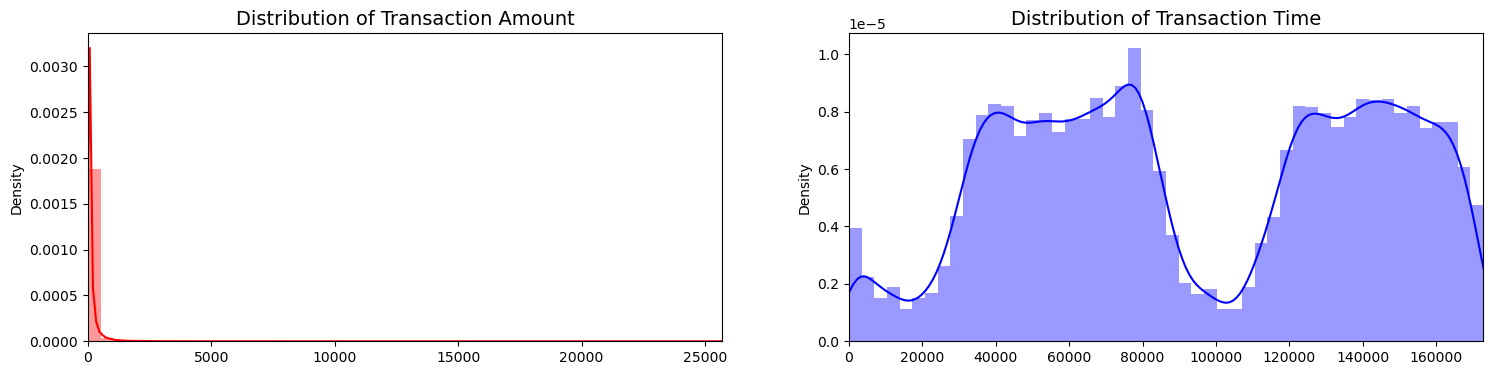

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

## II. Preprocessing

### a) Scaling and Distributing

In this phase, we'll first focus on scaling the columns related to **Time** and **Amount**. It's crucial to scale these columns just like the others. Additionally, we'll create a subsample of the dataframe to ensure an equal representation of fraud and non-fraud cases. This balance helps our algorithms more effectively identify patterns that determine whether a transaction is fraudulent or not.

### What is a Subsample?

A subsample, in this context, refers to a new dataframe where the number of fraud and non-fraud transactions are equal. This means our subsample will have an equal number of fraud and non-fraud cases.

### Why Create a Subsample?

The original dataframe is highly imbalanced, which can lead to several issues:

- **Overfitting:** If the model sees a lot more non-fraud cases, it may learn to predict "no fraud" more frequently, even when fraud occurs. We want the model to be adept at identifying fraud cases.
  
- **Misleading Correlations:** The imbalance can skew the understanding of how features (like the "V" features) relate to the outcome (fraud or non-fraud). An equal representation helps in better understanding these relationships.

### Summary:

- **Scaled Amount** and **Scaled Time** are the columns where scaling has been applied.
- There are **492 fraud cases** in the dataset, so we'll randomly select 492 non-fraud cases to balance the dataset.
- By concatenating these 492 fraud and 492 non-fraud cases, we will create a new, balanced subsample.

In [9]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler (RobustScaler is less prone to outliers.)
rob_scaler = RobustScaler()

# Scale the Amount and Time columns
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original Time and Amount columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
# Extract scaled columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Drop the scaled columns from their current positions
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Reinsert the scaled columns at the start of the dataframe
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# The Amount and Time columns are now scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### b) Splitting the Data

In [11]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Print the percentage of fraud and non-fraud cases in the dataset
print('No Frauds:', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

# Prepare features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize StratifiedKFold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split the data and print train and test indices for each fold
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Convert data to NumPy arrays
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Check the distribution of labels in the train and test sets
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label / len(original_ytrain))
print(test_counts_label / len(original_ytest))

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## III. Mitigating Bias [Random UnderSampling and Oversampling]

## Random Under-Sampling

In this phase, we will implement **Random Under-Sampling** to achieve a more balanced dataset, which helps in reducing the risk of our models overfitting.

### Steps:

1. **Determine Class Imbalance:** 
   First, we need to assess the extent of class imbalance by using `value_counts()` on the class column to find out how many instances belong to each label.

2. **Balance the Dataset:**
   Identify the number of fraud transactions (Fraud = "1"). To balance the dataset, we will adjust the number of non-fraud transactions to match the number of fraud transactions. For a 50/50 ratio, we will have 492 cases of fraud and 492 cases of non-fraud.

3. **Shuffle the Data:**
   After balancing the dataset with the random under-sampling technique, we'll shuffle the data. This helps in evaluating whether our models can consistently achieve good accuracy with different runs of the script.

**Note:** One major drawback of **Random Under-Sampling** is the potential for **information loss**, as reducing the number of non-fraud transactions from 284,315 to 492 may impact the performance of our classification models.

In [12]:
df = df.sample(frac=1, random_state=42)

# Extract fraud and non-fraud cases
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:492]

# Concatenate the fraud and non-fraud cases to create a balanced dataframe
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the rows of the balanced dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)

# Display the first few rows of the balanced dataframe
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146884,-0.293579,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.209856,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
96768,1.872424,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.294785,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1


##  a) Distributing and Correlating: 
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Class Distribution in the Subsampled Dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


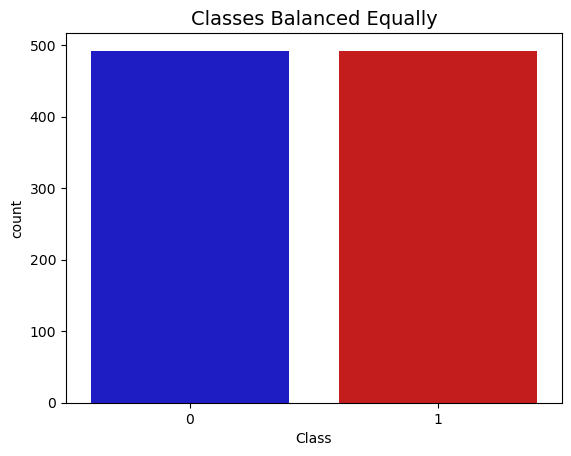

In [13]:
print('Class Distribution in the Subsampled Dataset')
print(new_df['Class'].value_counts() / len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Classes Balanced Equally', fontsize=14)
plt.show()

### Correlation Matrices

Correlation matrices are crucial for understanding our data. They help us determine which features significantly influence whether a transaction is fraudulent. To accurately assess feature correlations, it is important to use the balanced subsample dataframe. This ensures that we correctly identify features with high positive or negative correlations with fraud transactions.

### Summary and Explanation:

- **Negative Correlations:** Features such as V17, V14, V12, and V10 show negative correlations. This means that lower values of these features are associated with a higher likelihood of a transaction being fraudulent.
  
- **Positive Correlations:** Features like V2, V4, V11, and V19 show positive correlations. Higher values of these features are associated with an increased likelihood of a transaction being fraudulent.
  
- **BoxPlots:** We will use boxplots to better understand the distribution of these features across fraudulent and non-fraudulent transactions.

**Note:** It’s essential to use the balanced subsample for the correlation matrix to avoid skewed results due to class imbalance in the original dataframe. The imbalance can distort the correlations, making it crucial to work with a balanced dataset.

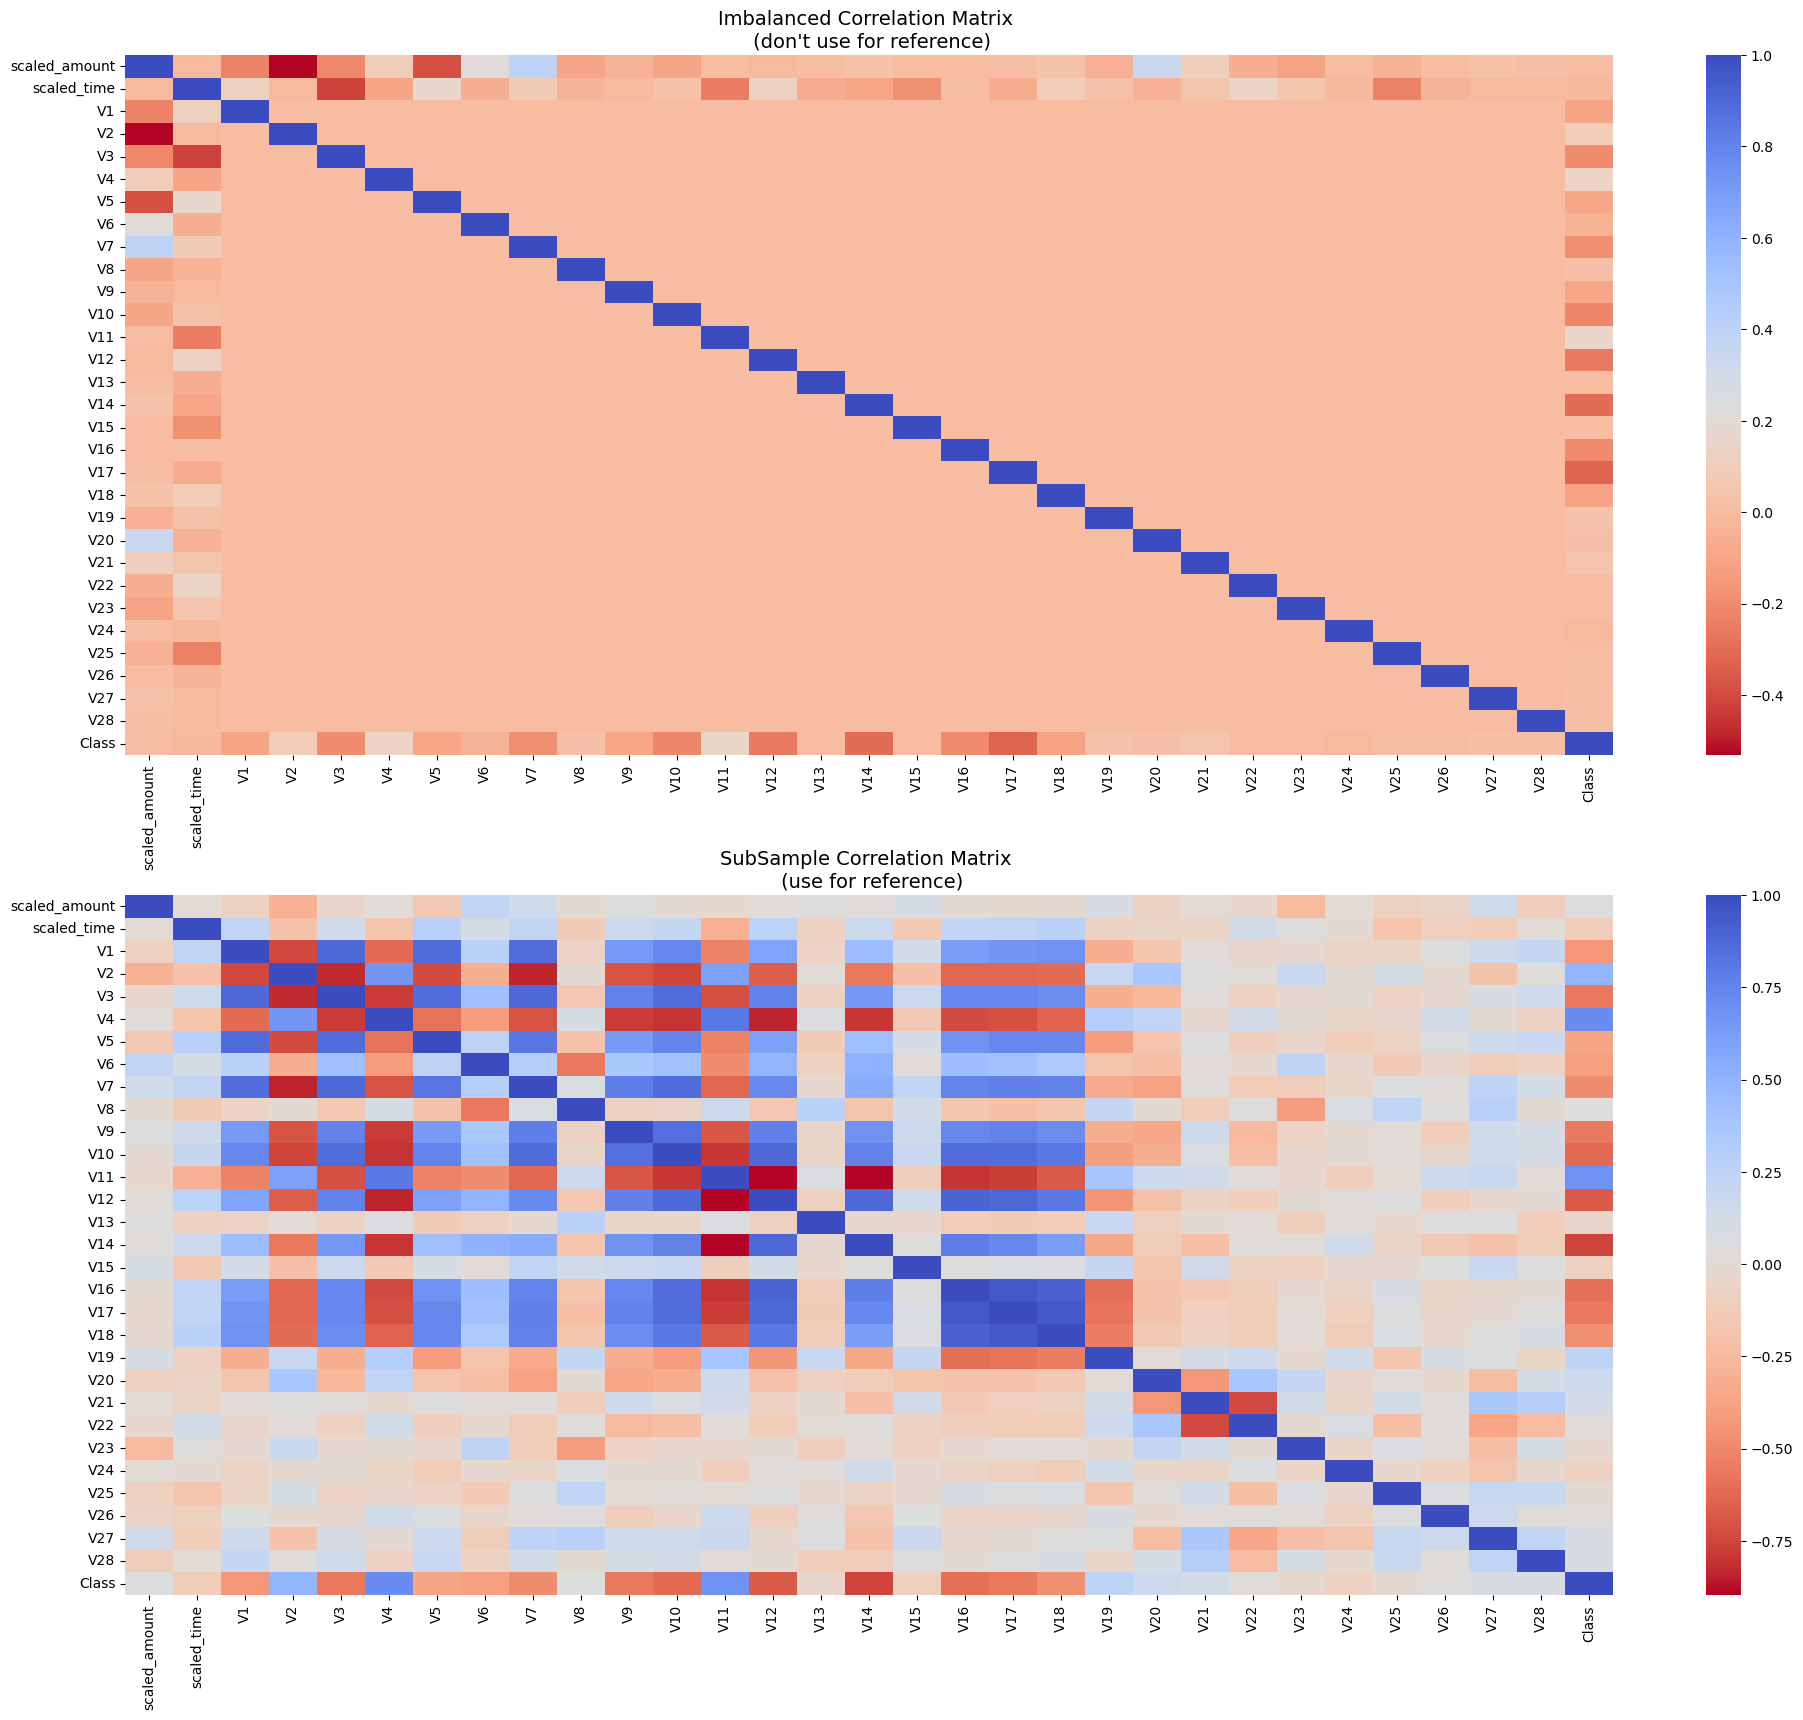

In [14]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

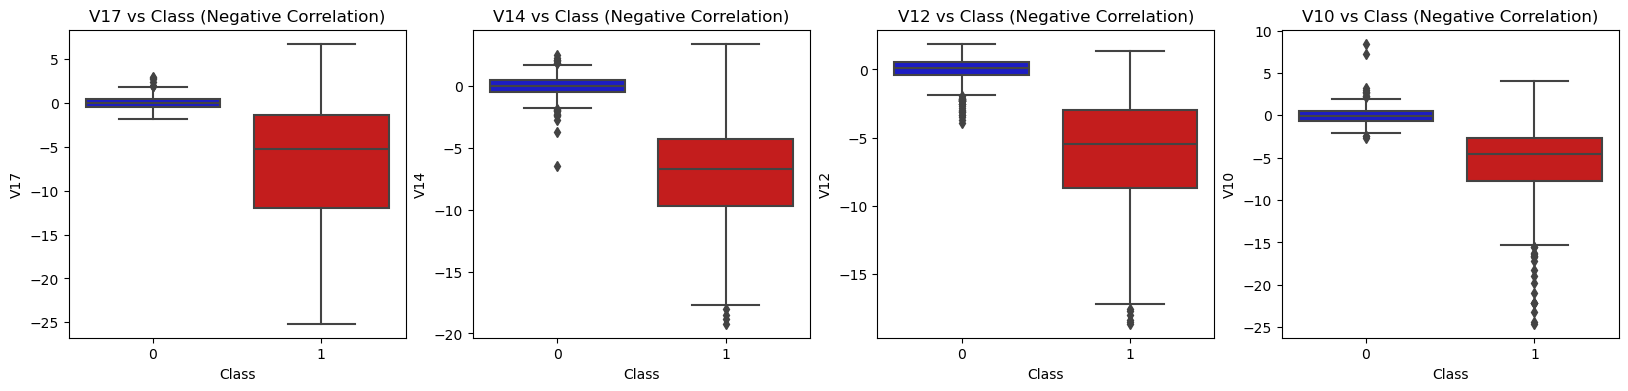

In [15]:
# Create subplots
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Boxplot for V17
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class (Negative Correlation)')

# Boxplot for V14
sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class (Negative Correlation)')

# Boxplot for V12
sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class (Negative Correlation)')

# Boxplot for V10
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class (Negative Correlation)')

# Display the plots
plt.show()

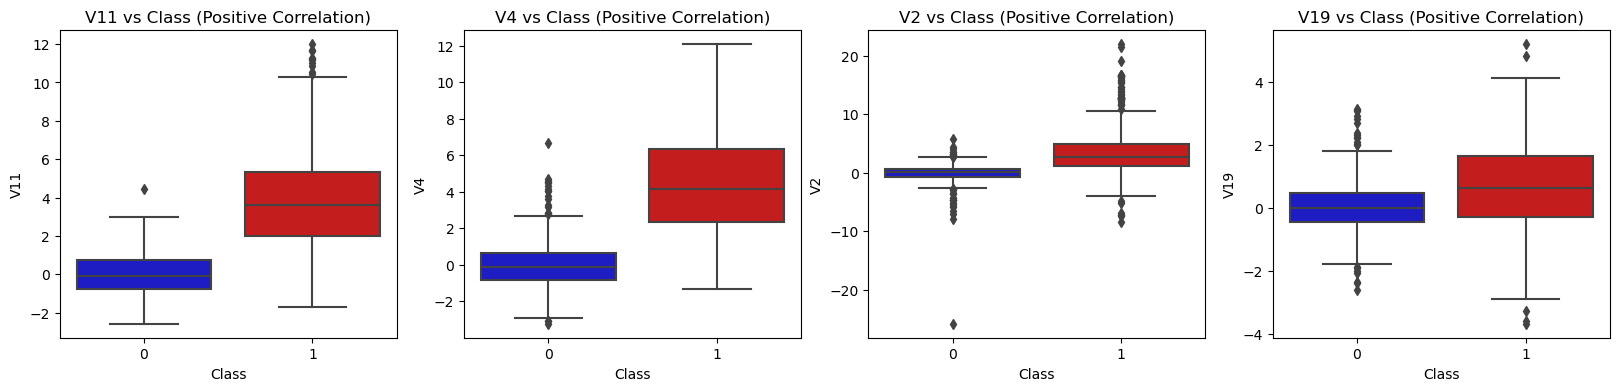

In [16]:
# Create subplots
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Boxplot for V11
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class (Positive Correlation)')

# Boxplot for V4
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

# Boxplot for V2
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class (Positive Correlation)')

# Boxplot for V19
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class (Positive Correlation)')

# Display the plots
plt.show()

## b) Anomaly Detection:
<a id="anomaly"></a>

Our goal in this section is to remove "extreme outliers" from features with a high correlation to our classes. This can improve the accuracy of our models.

### Interquartile Range Method:
- **Interquartile Range (IQR):** This is the difference between the 75th percentile and the 25th percentile. We set a threshold beyond these percentiles; any instances exceeding this threshold will be removed.
- **Boxplots:** These help visualize the 25th and 75th percentiles and identify extreme outliers (points beyond the whiskers).

### Outlier Removal Tradeoff:
We need to balance the threshold for removing outliers. The threshold is determined by multiplying a factor (e.g., 1.5) by the IQR. A higher threshold detects fewer outliers, while a lower threshold detects more outliers.

**The Tradeoff:**
- Lower thresholds remove more outliers but may risk losing valuable information.
- We aim to remove "extreme outliers" to avoid information loss and maintain model accuracy.

### Summary:
1. **Visualize Distributions:** Start by visualizing the feature distributions. For example, V14 has a Gaussian distribution compared to V12 and V10.
2. **Determine the Threshold:** Decide on a multiplier for the IQR to set the lower (Q1 - threshold) and upper (Q3 + threshold) extremes.
3. **Conditional Dropping:** Remove instances that exceed these thresholds.
4. **Boxplot Representation:** Use boxplots to show the reduction in "extreme outliers."

**Note:** Removing outliers has improved model accuracy by over 3%. While outliers can distort model accuracy, we must avoid excessive information loss to prevent underfitting.

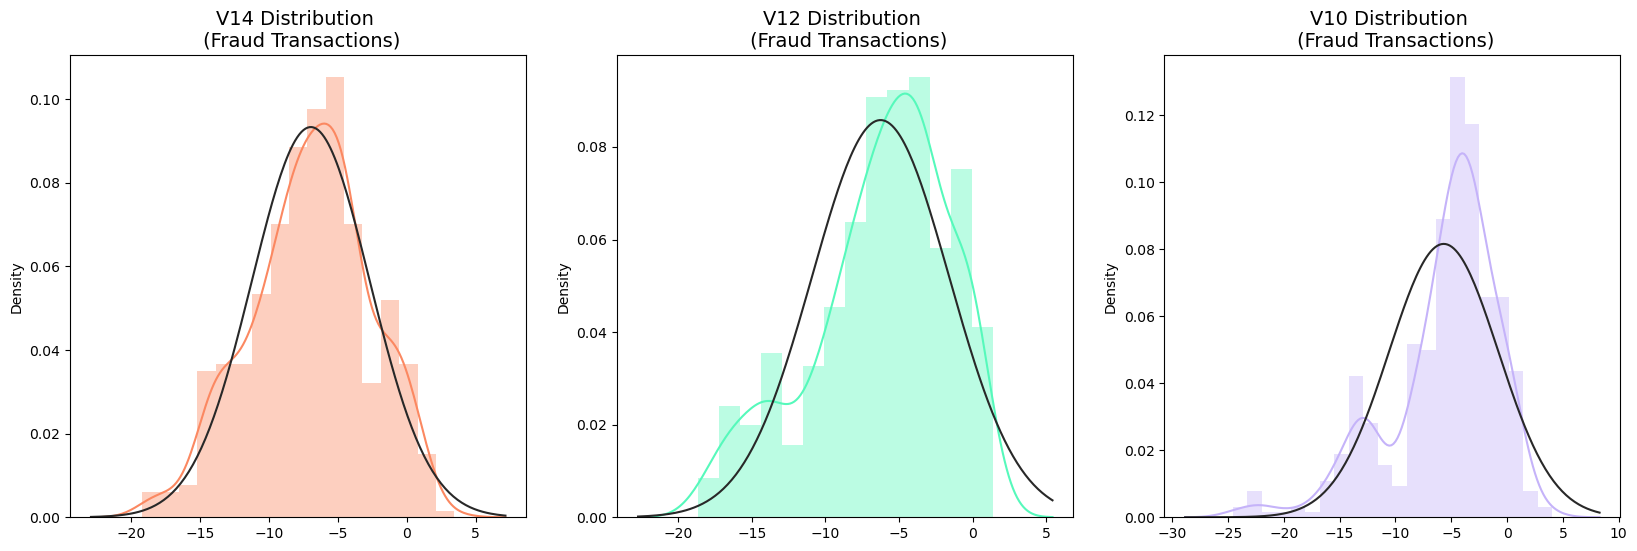

In [17]:
from scipy.stats import norm

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# V14 distribution for fraud transactions
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# V12 distribution for fraud transactions
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# V10 distribution for fraud transactions
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

# Display the plots
plt.show()

In [18]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v14_iqr = q75 - q25
print(f'IQR: {v14_iqr}')

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print(f'Cut Off: {v14_cut_off}')
print(f'V14 Lower: {v14_lower}')
print(f'V14 Upper: {v14_upper}')

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print(f'Feature V14 Outliers for Fraud Cases: {len(outliers)}')
print(f'V14 Outliers: {outliers}')

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('-' * 176)

# -----> V12 Removing Outliers from Fraud Transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print(f'V12 Lower: {v12_lower}')
print(f'V12 Upper: {v12_upper}')
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print(f'V12 Outliers: {outliers}')
print(f'Feature V12 Outliers for Fraud Cases: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print(f'Number of Instances after V12 Outliers Removal: {len(new_df)}')
print('-' * 176)

# -----> V10 Removing Outliers
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print(f'V10 Lower: {v10_lower}')
print(f'V10 Upper: {v10_upper}')
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print(f'V10 Outliers: {outliers}')
print(f'Feature V10 Outliers for Fraud Cases: {len(outliers)}')
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print(f'Number of Instances after V10 Outliers Removal: {len(new_df)}')

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 Outliers: [-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 Outliers: [-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after V12 Outliers Removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 Outliers: [-15.5637913387301, -22.1

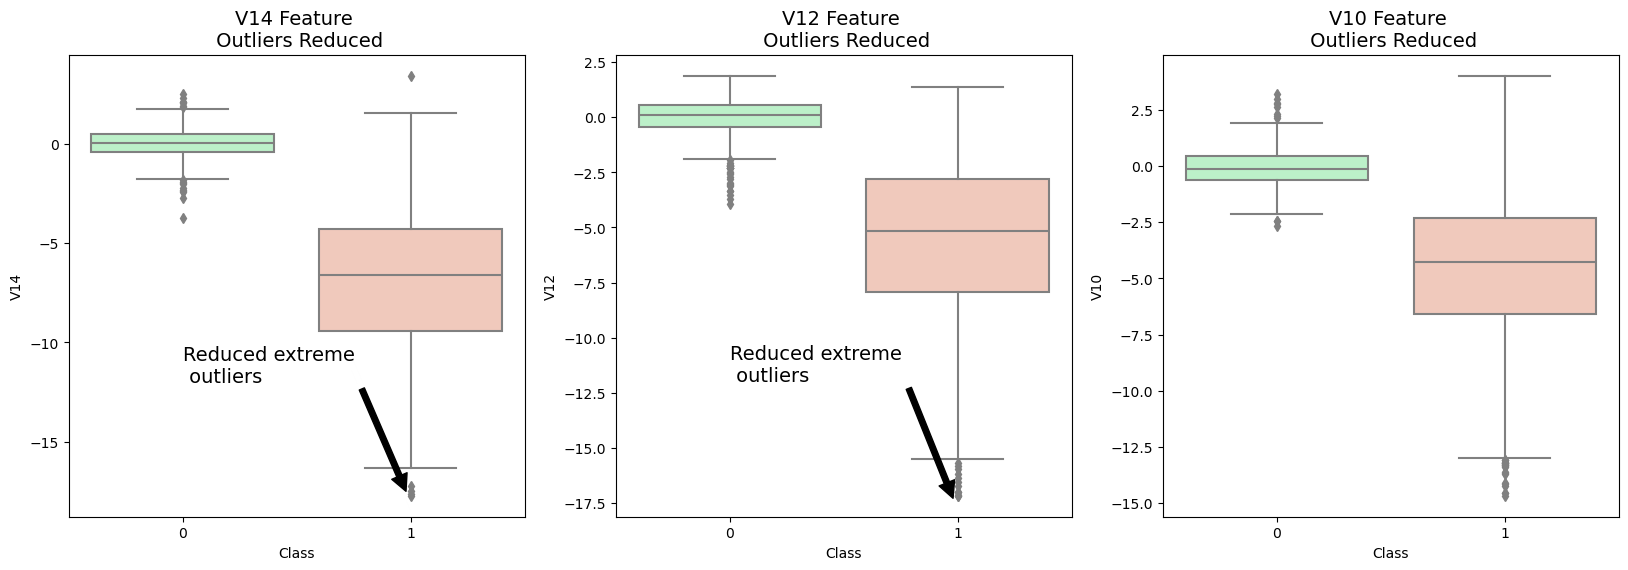

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

colors = ['#B3F9C5', '#f9c5b3']

# Boxplots after outlier removal
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Outliers Reduced", fontsize=14)
ax1.annotate('Reduced extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)

# Feature V12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Outliers Reduced", fontsize=14)
ax2.annotate('Reduced extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Outliers Reduced", fontsize=14)
ax3.annotate('Reduced extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

<h2>c) Dimensionality Reduction and Clustering (t-SNE): </h2>
<a id="clustering"></a>

<ul>
<li>The t-SNE algorithm effectively clusters fraud and non-fraud cases in our dataset.</li>
<li>Despite the small subsample size, the t-SNE algorithm consistently detects clusters accurately, even when the dataset is shuffled before running t-SNE.</li>
<li>This suggests that subsequent predictive models will likely perform well in distinguishing between fraud and non-fraud cases.</li>
</ul>

In [20]:
# Prepare data
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Implementing t-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2f} seconds".format(t1 - t0))

# Implementing PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2f} seconds".format(t1 - t0))

# Implementing Truncated SVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2f} seconds".format(t1 - t0))

T-SNE took 2.10 seconds
PCA took 0.02 seconds
Truncated SVD took 0.00 seconds


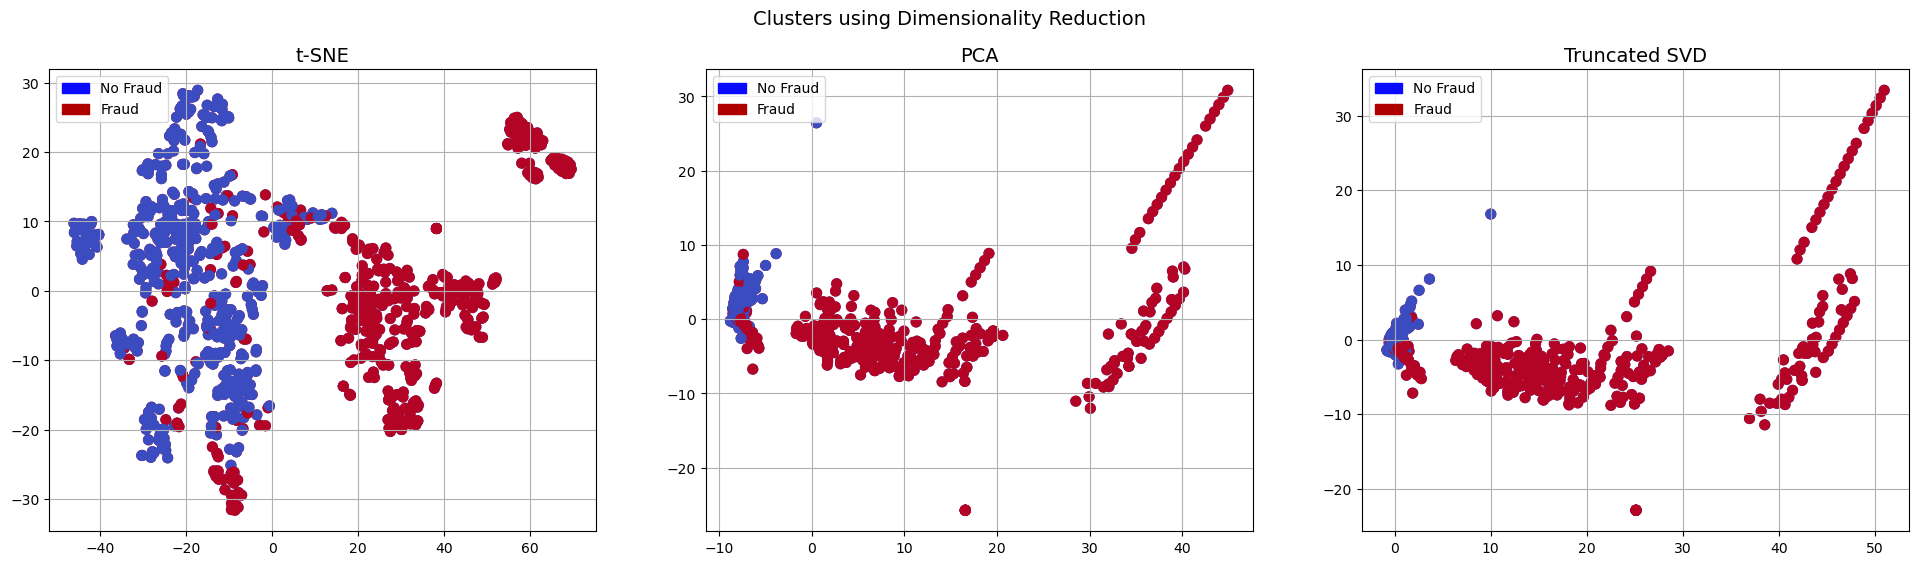

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## d) Classifiers (UnderSampling)

In this section, we will train four types of classifiers to determine which one is most effective at detecting **fraudulent transactions**. Before that, we need to split our data into training and testing sets and separate the features from the labels.

#### Summary:
- **Logistic Regression** classifier generally outperforms the other three classifiers.
- **GridSearchCV** helps identify the parameters that yield the best predictive performance for the classifiers.
- Logistic Regression exhibits the highest Receiving Operating Characteristic (ROC) score, indicating its effectiveness in distinguishing between **fraud** and **non-fraud** transactions.

#### Learning Curves:
- A **wider gap** between the training score and the cross-validation score suggests that the model is **overfitting (high variance)**.
- A low score in both training and cross-validation sets indicates that the model is **underfitting (high bias)**.
- **Logistic Regression Classifier** demonstrates the best performance in both training and cross-validation sets.

In [22]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [23]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [25]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [26]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [27]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [28]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.32%
Knears Neighbors Cross Validation Score 93.92%
Support Vector Classifier Cross Validation Score 93.92%
DecisionTree Classifier Cross Validation Score 91.55%


In [29]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression and stratified shuffle split
log_reg = LogisticRegression()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Prepare data for undersampling
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# Split the data
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

# Initialize lists to store metrics
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implement NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution:', Counter(y_nearmiss))

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))


Train: [265500 180241  42621 ...  29016  13731  17623] Test: [262997  11349 147250 ... 274523 269803  64112]
Train: [ 72164 114233  16767 ... 264447 191863 284015] Test: [202590  32931 128077 ... 243995 127622  48251]
Train: [ 20844 114574 167603 ... 244474 178905 218471] Test: [284351  82415  90915 ... 171150 168729 271589]
Train: [122209 181598 194347 ... 104568 277580  29386] Test: [225642  63292  67966 ... 279449  77489  75981]
Train: [241657 223433 136901 ...  86428 160462  49568] Test: [157466 204812  83689 ... 251449 178900 216812]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [30]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/preethambingi/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

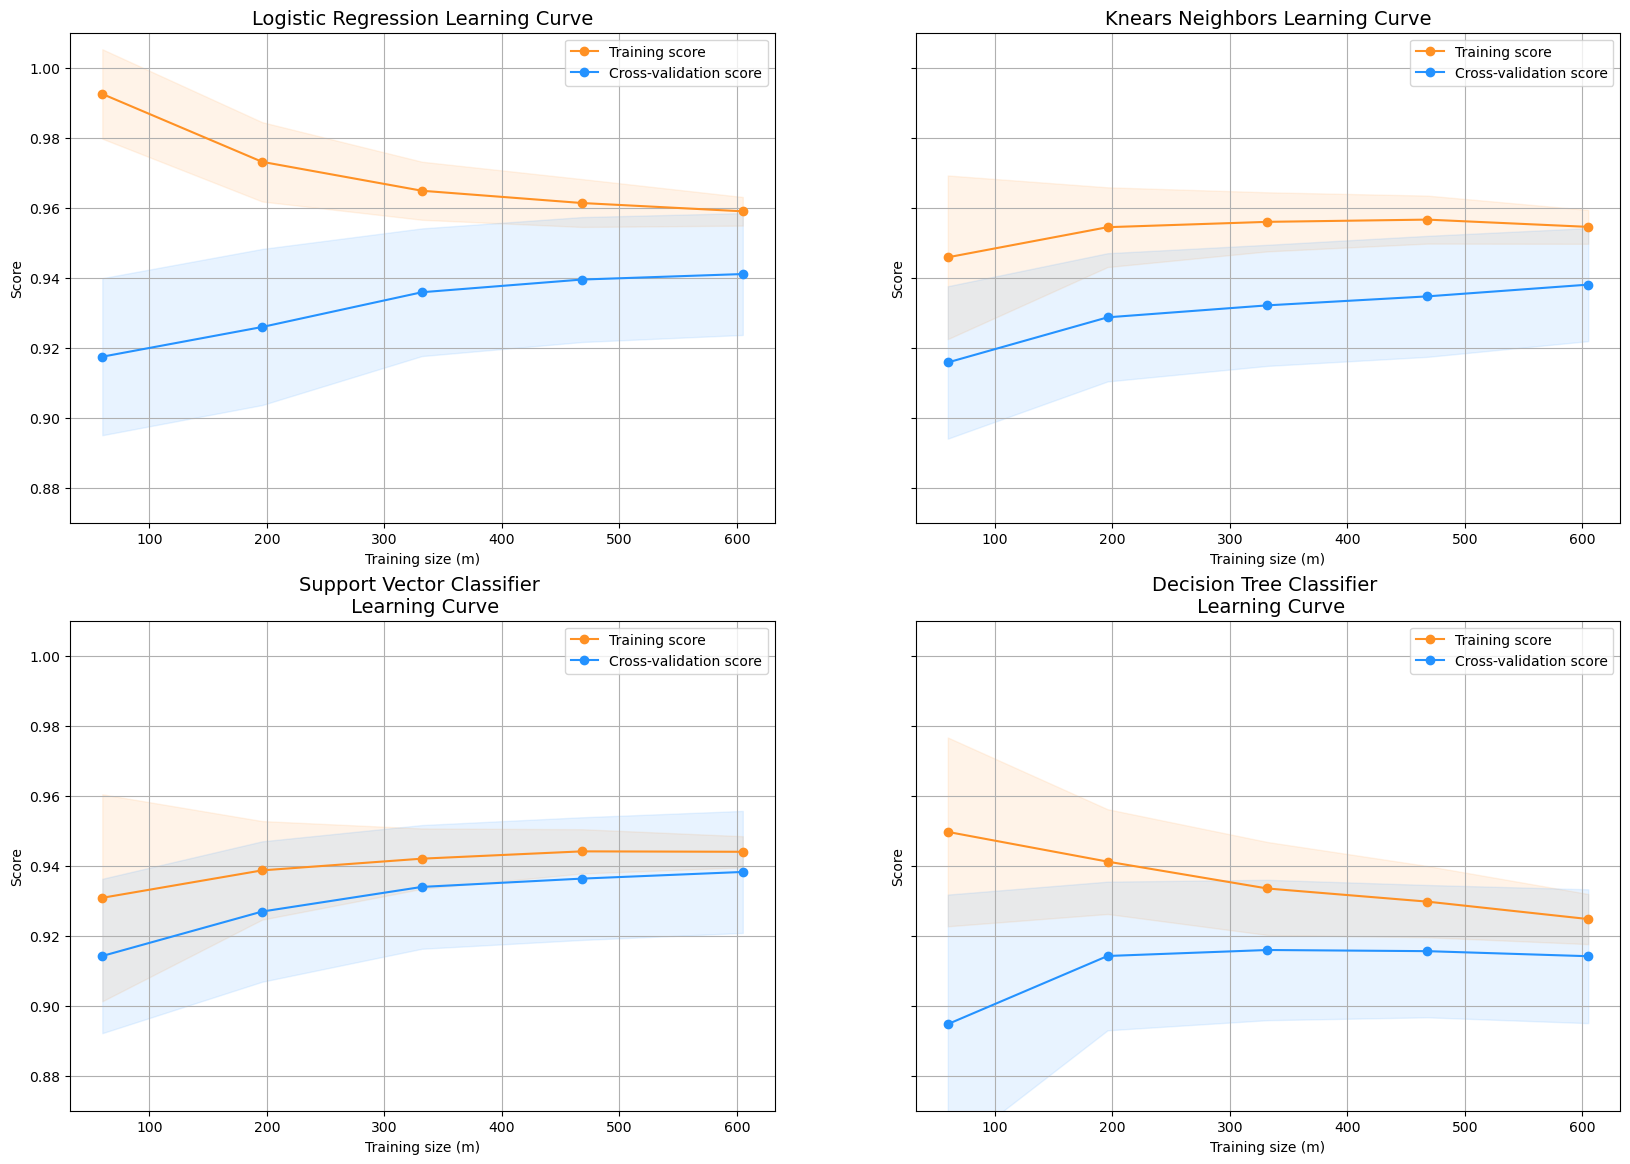

In [31]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [33]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9723120650788983
KNears Neighbors:  0.9374763724954845
Support Vector Classifier:  0.9788437574382883
Decision Tree Classifier:  0.9113321012027276


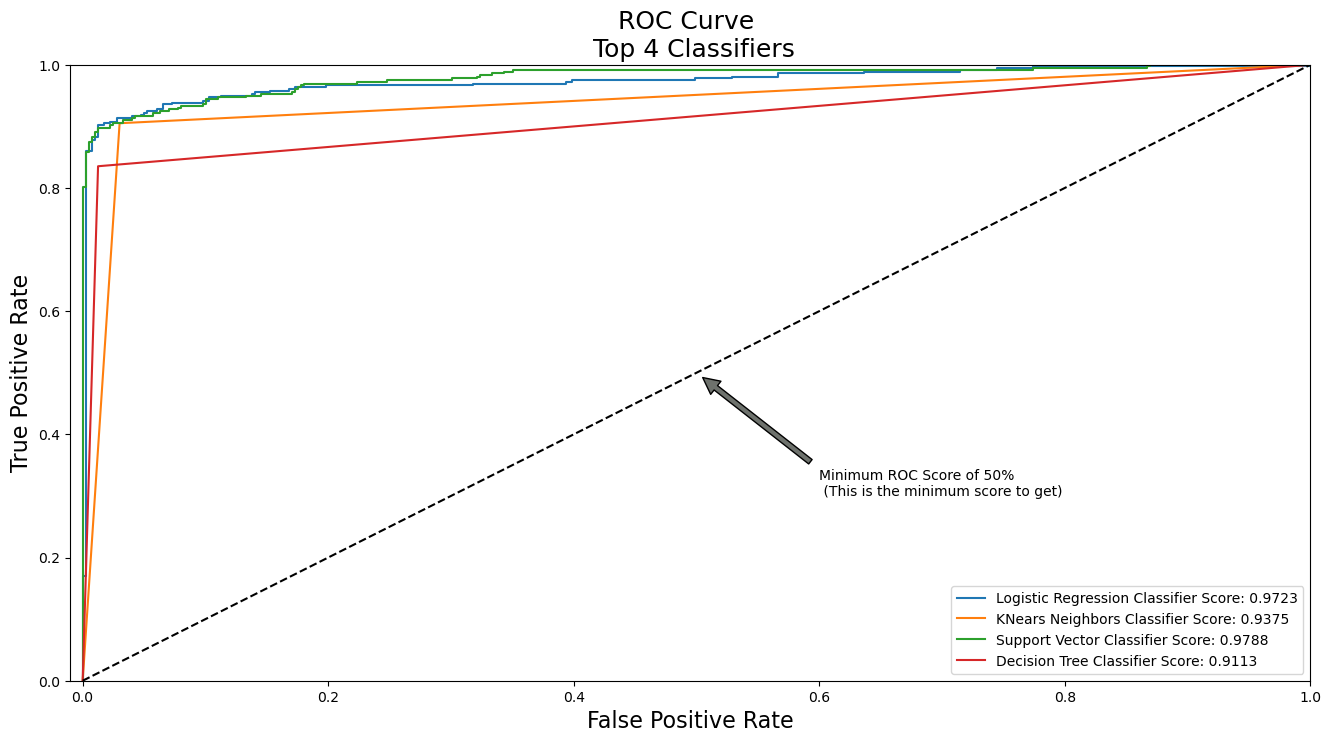

In [34]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## e) A Deeper Look into Logistic Regression:

In this section, we will explore the **logistic regression classifier** in greater detail.

#### Terms:
- **True Positives:** Correctly classified fraud transactions.
- **False Positives:** Incorrectly classified fraud transactions.
- **True Negatives:** Correctly classified non-fraud transactions.
- **False Negatives:** Incorrectly classified non-fraud transactions.
- **Precision:** True Positives / (True Positives + False Positives).
- **Recall:** True Positives / (True Positives + False Negatives).
- **Precision:** Indicates how accurate our model is in detecting fraud transactions.
- **Recall:** Represents the proportion of actual fraud cases our model can detect.
- **Precision/Recall Tradeoff:** A higher precision means being more selective, which might result in detecting fewer cases. For example, if our model has 95% precision, it might confidently detect only a few fraud cases. Lowering the precision threshold could result in detecting more fraud cases but with less certainty.

#### Summary:
- **Precision** begins to decrease between 0.90 and 0.92. However, even with this decline, the precision score remains high and we still achieve a reasonable recall score.

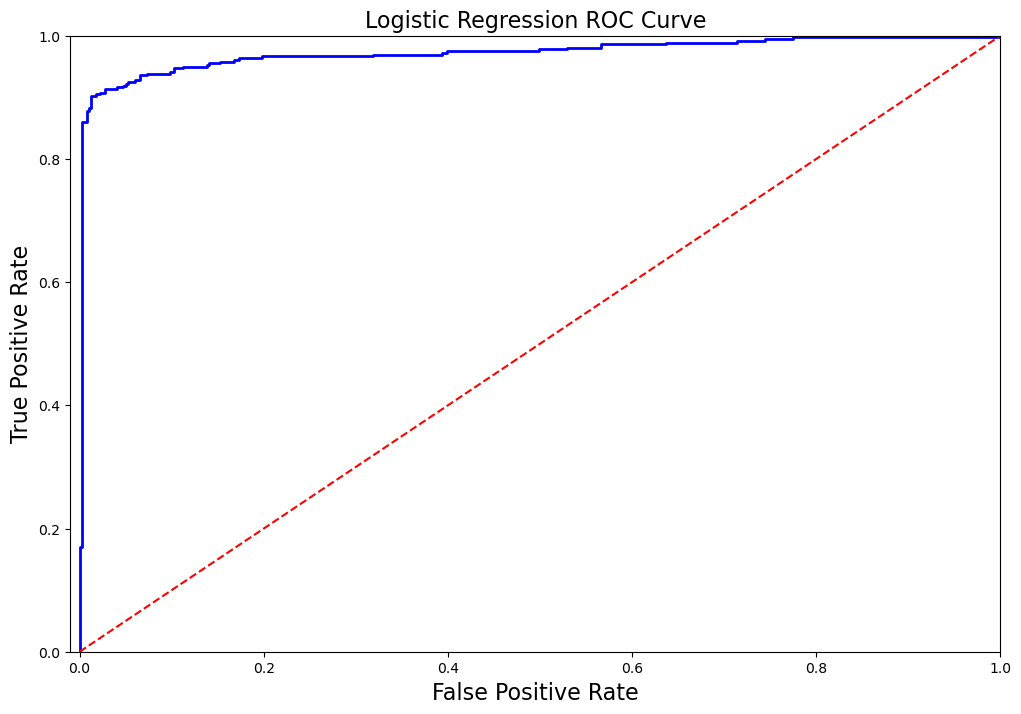

In [35]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [36]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.62
F1 Score: 0.75
Accuracy Score: 0.70
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.55
Precision Score: 0.00
Recall Score: 0.94
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [38]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [39]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.01


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.01')

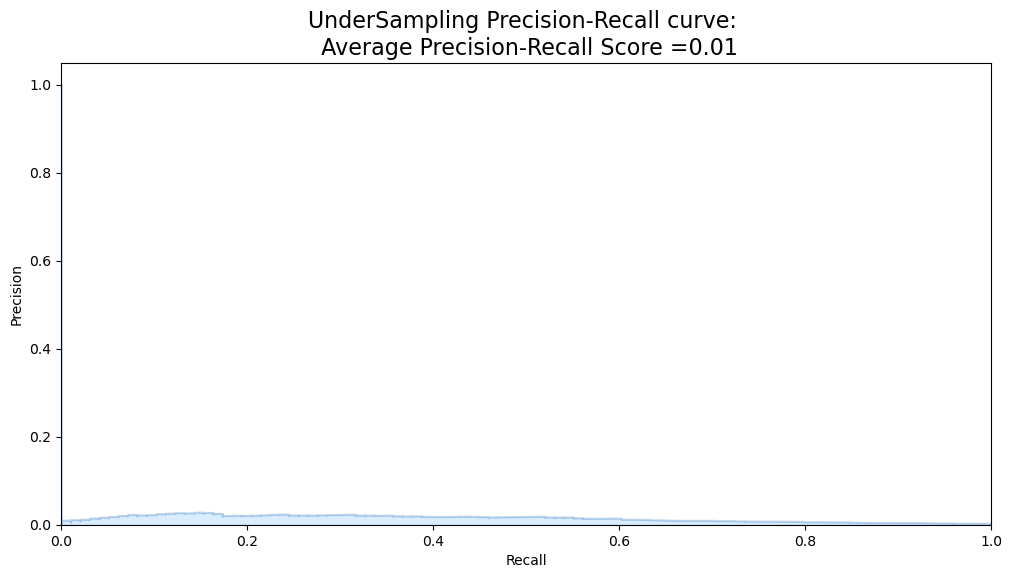

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

## f) SMOTE Technique (Over-Sampling)
<a id="smote"></a>


**SMOTE** (Synthetic Minority Over-sampling Technique) is used to balance class distributions by creating synthetic points from the minority class. This method contrasts with random undersampling, where rows are deleted to balance the classes.

### Understanding SMOTE:
- **Solving the Class Imbalance:** SMOTE generates synthetic points for the minority class to balance the dataset.
- **Location of Synthetic Points:** SMOTE selects the distance between the closest neighbors of the minority class and generates synthetic points within these distances.
- **Final Effect:** More information is retained compared to random undersampling, as no rows are removed.
- **Accuracy vs. Time Tradeoff:** While SMOTE can improve accuracy, it requires more time to train the model since it retains all original data and adds synthetic points.

### Cross-Validation Overfitting Mistake:
**Overfitting during Cross Validation:** A common mistake in undersampling/oversampling is applying these techniques before cross-validation, leading to "data leakage" and overfitting. Here’s how it should be done correctly:

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Print lengths of training and testing sets
print(f'Length of X (train): {len(original_Xtrain)} | Length of y (train): {len(original_ytrain)}')
print(f'Length of X (test): {len(original_Xtest)} | Length of y (test): {len(original_ytest)}')

# Lists to store evaluation metrics
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

# Define hyperparameters for RandomizedSearchCV
log_reg_params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implement SMOTE and perform cross-validation
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)  # Apply SMOTE during cross-validation
    model = pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])
    best_est = rand_log_reg.best_estimator_
    predictions = best_est.predict(original_Xtrain[test_idx])
    
    # Append metrics to lists
    accuracy_lst.append(pipeline.score(original_Xtrain[test_idx], original_ytrain[test_idx]))
    precision_lst.append(precision_score(original_ytrain[test_idx], predictions))
    recall_lst.append(recall_score(original_ytrain[test_idx], predictions))
    f1_lst.append(f1_score(original_ytrain[test_idx], predictions))
    auc_lst.append(roc_auc_score(original_ytrain[test_idx], predictions))
    
print('---' * 45)
print('')
print(f"Accuracy: {np.mean(accuracy_lst)}")
print(f"Precision: {np.mean(precision_lst)}")
print(f"Recall: {np.mean(recall_lst)}")
print(f"F1 Score: {np.mean(f1_lst)}")
print('---' * 45)


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

Accuracy: 0.9787447882378757
Precision: 0.06969335718559376
Recall: 0.9063291139240505
F1 Score: 0.12938522012716203
---------------------------------------------------------------------------------------------------------------------------------------


In [42]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.85      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [43]:
y_score = best_est.decision_function(original_Xtest)

In [44]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.79


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.79')

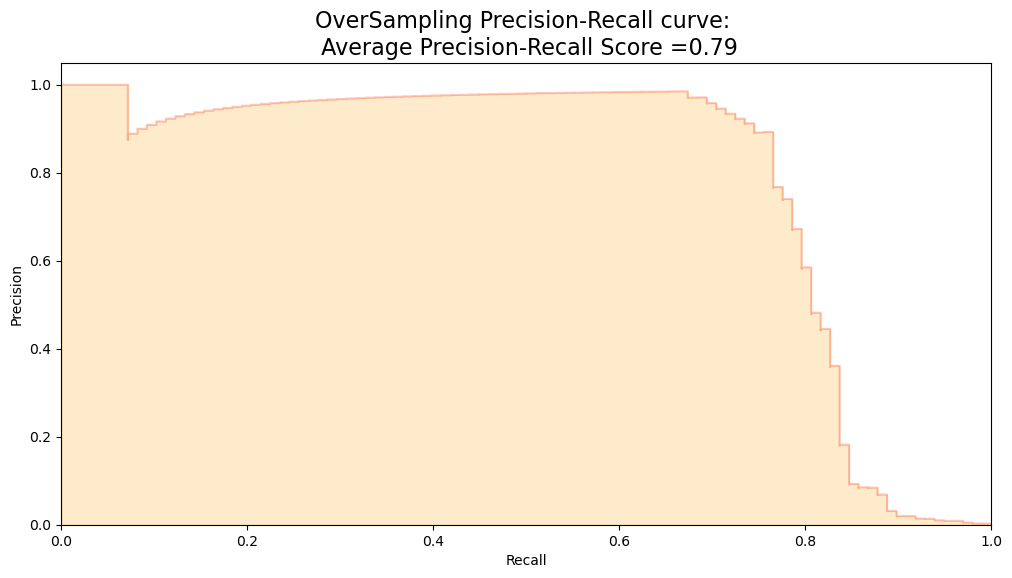

In [45]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [46]:
from imblearn.over_sampling import SMOTE

# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

# This will be the data we are going to use
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)


In [47]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :4.147416114807129 sec


## IV. Testing

### a) Test Data with Logistic Regression:

#### Confusion Matrix:

- **Positive/Negative:** Indicates the type of class label ["No", "Yes"]
- **True/False:** Indicates whether the class was correctly or incorrectly classified by the model.

**Definitions:**
- **True Negatives (Top-Left Square):** The number of correct classifications of the "No" (No Fraud Detected) class.
- **False Negatives (Top-Right Square):** The number of incorrect classifications of the "No" (No Fraud Detected) class.
- **False Positives (Bottom-Left Square):** The number of incorrect classifications of the "Yes" (Fraud Detected) class.
- **True Positives (Bottom-Right Square):** The number of correct classifications of the "Yes" (Fraud Detected) class.

### Summary:

- **Random Undersampling:** We will assess the final performance of the classification models using a subset created by random undersampling. **Note that this data is not from the original dataframe.**
- **Classification Models:** The models that performed best were **logistic regression** and **support vector classifier (SVM)**.

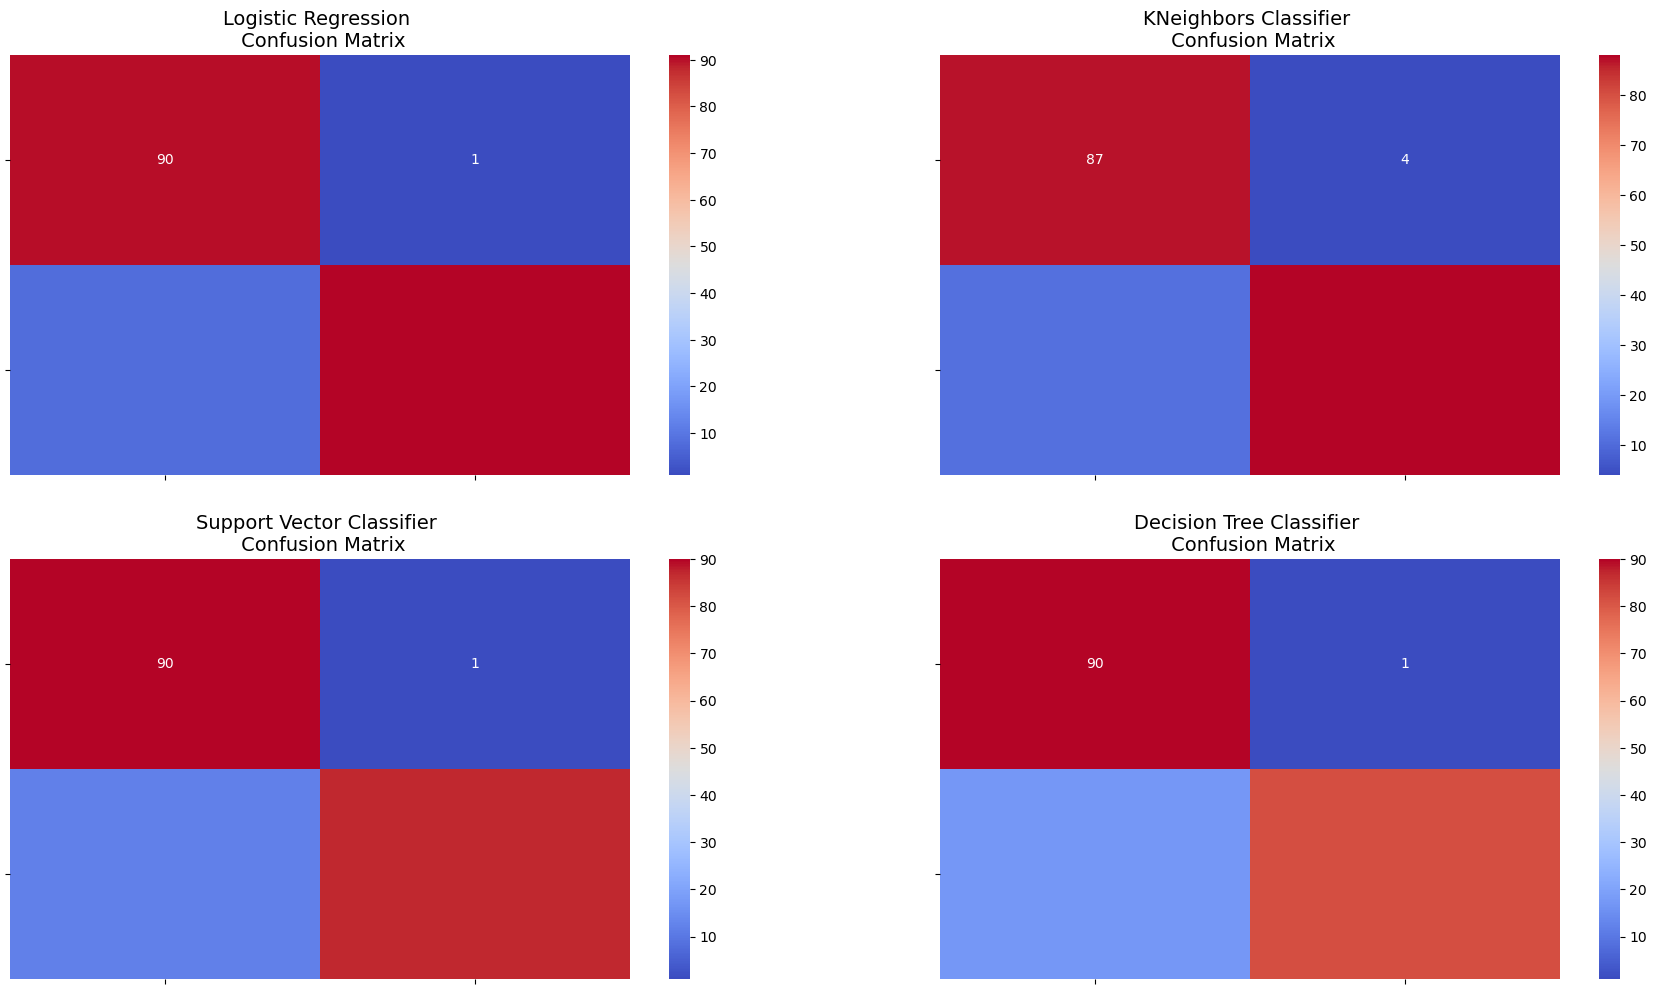

In [48]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2, figsize=(22, 12))

# Confusion matrix for Logistic Regression
sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap='coolwarm')
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Confusion matrix for KNeighbors Classifier
sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap='coolwarm')
ax[0][1].set_title("KNeighbors Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Confusion matrix for Support Vector Classifier
sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap='coolwarm')
ax[1][0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Confusion matrix for Decision Tree Classifier
sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap='coolwarm')
ax[1][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()


In [49]:
from sklearn.metrics import classification_report

# Display classification reports for each model

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNeighbors Classifier:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        91
           1       0.99      0.92      0.95        99

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190

KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        91
           1       0.96      0.89      0.92        99

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        91
           1       0.99      0.88      0.93        99

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
wei

In [50]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression using Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression using SMOTE Technique (Better accuracy with SMOTE)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

# Create a DataFrame to compare scores
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Reorder columns for better readability
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note: While high accuracy scores can be misleading, it's crucial to look deeper into other performance metrics.
final_df

,Technique,Score
0,Random UnderSampling,0.736842
1,Oversampling (SMOTE),0.988501


## b) Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE): 
<a id="neural_networks"></a>
In this section we will implement a simple Neural Network (with one hidden layer) in order to see  which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions. <br><br>

### Our Main Goal:
Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases. Why not only focus on fraud? Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.


### The Confusion Matrix:
Here is again, how the confusion matrix works:
<ul>
<li><b>Upper Left Square: </b> The amount of <b>correctly</b> classified by our model of  no fraud transactions. </li>
<li> <b>Upper Right Square:</b> The amount of  <b>incorrectly </b> classified transactions as fraud cases, but the actual label is <b> no fraud </b>. </li>
<li><b>Lower Left Square:</b> The amount of <b> incorrectly </b> classified transactions as no fraud cases, but the actual label is <b>fraud </b>. </li>
<li><b> Lower Right Square:</b> The amount of  <b>correctly</b> classified by our model of fraud transactions. </li>
</ul>

### Summary (Keras || Random UnderSampling):
<ul>
<li><b>Dataset: </b> In this final phase of testing we will fit this model in both the <b>random undersampled subset</b>  and <b> oversampled dataset (SMOTE) </b>in order to predict the final result using the <b>original dataframe testing data.</b> </li>
<li>  <b>Neural Network Structure: </b> As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud). </li>
<li> <b>Other characteristics:</b> The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.) </li>
</ul>


In [51]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Number of input features
n_inputs = X_train.shape[1]

# Define the neural network model
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
undersample_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=[categorical_crossentropy, 'accuracy']
)

In [52]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1988 (7.77 KB)
Trainable params: 1988 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 0s - loss: 0.4862 - accuracy: 0.6909 - val_loss: 0.3959 - val_accuracy: 0.8487 - 272ms/epoch - 11ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3174 - accuracy: 0.9107 - val_loss: 0.3269 - val_accuracy: 0.9079 - 21ms/epoch - 846us/step
Epoch 3/20
25/25 - 0s - loss: 0.2475 - accuracy: 0.9223 - val_loss: 0.2228 - val_accuracy: 0.9211 - 23ms/epoch - 920us/step
Epoch 4/20
25/25 - 0s - loss: 0.2018 - accuracy: 0.9372 - val_loss: 0.1731 - val_accuracy: 0.9408 - 21ms/epoch - 836us/step
Epoch 5/20
25/25 - 0s - loss: 0.1722 - accuracy: 0.9471 - val_loss: 0.1407 - val_accuracy: 0.9474 - 19ms/epoch - 763us/step
Epoch 6/20
25/25 - 0s - loss: 0.1521 - accuracy: 0.9521 - val_loss: 0.1219 - val_accuracy: 0.9539 - 20ms/epoch - 785us/step
Epoch 7/20
25/25 - 0s - loss: 0.1359 - accuracy: 0.9587 - val_loss: 0.1112 - val_accuracy: 0.9539 - 19ms/epoch - 774us/step
Epoch 8/20
25/25 - 0s - loss: 0.1249 - accuracy: 0.9603 - val_loss: 0.1066 - val_accuracy: 0.9539 - 19ms/epoch - 743us/step
Epoch 9/

In [55]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [56]:
import numpy as np

# Generate predictions on the test set
predictions_prob = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

# Convert predicted probabilities to class labels
undersample_fraud_predictions = np.argmax(predictions_prob, axis=1)

# Display the first few predictions for review
print(undersample_fraud_predictions[:10])

[1 1 1 1 1 1 1 1 1 1]


In [57]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Function to create and plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and visualizes the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion matrix, without normalization
[[55163  1700]
 [    6    92]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


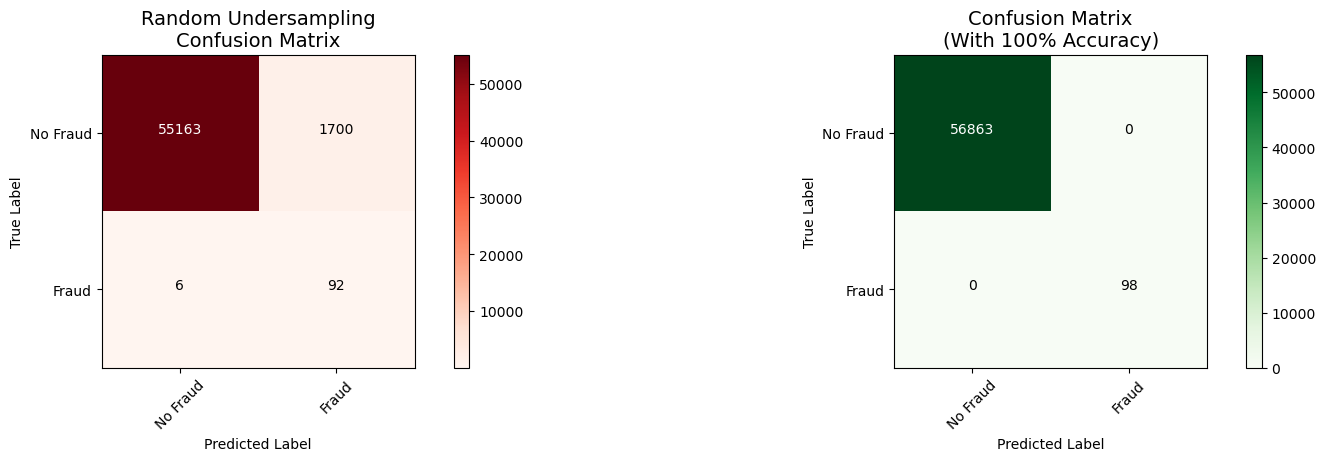

In [58]:
# Generate confusion matrices
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# Define class labels
labels = ['No Fraud', 'Fraud']

# Create a figure with specified size
fig = plt.figure(figsize=(16, 8))

# Add subplot for the confusion matrix of the undersampled data
fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random Undersampling\nConfusion Matrix", cmap=plt.cm.Reds)

# Add subplot for the confusion matrix with 100% accuracy (ideal case)
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix\n(With 100% Accuracy)", cmap=plt.cm.Greens)

### Keras || OverSampling (SMOTE):


In [59]:
# Define the number of input features
n_inputs = Xsm_train.shape[1]

# Construct the neural network model
oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),  # Input layer with ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    Dense(2, activation='softmax')  # Output layer with 2 neurons and softmax activation for classification
])

In [60]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 1s - loss: 0.0599 - accuracy: 0.9779 - val_loss: 0.0225 - val_accuracy: 0.9968 - 737ms/epoch - 607us/step
Epoch 2/20
1214/1214 - 1s - loss: 0.0114 - accuracy: 0.9975 - val_loss: 0.0134 - val_accuracy: 0.9991 - 510ms/epoch - 420us/step
Epoch 3/20
1214/1214 - 1s - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0023 - val_accuracy: 1.0000 - 512ms/epoch - 422us/step
Epoch 4/20
1214/1214 - 1s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0017 - val_accuracy: 1.0000 - 518ms/epoch - 427us/step
Epoch 5/20
1214/1214 - 1s - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0017 - val_accuracy: 0.9998 - 523ms/epoch - 430us/step
Epoch 6/20
1214/1214 - 1s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0010 - val_accuracy: 1.0000 - 520ms/epoch - 428us/step
Epoch 7/20
1214/1214 - 1s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 1.0000 - 517ms/epoch - 426us/step
Epoch 8/20
1214/1214 - 1s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.

In [62]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [63]:
import numpy as np

# Generate probability predictions for the test set
predictions_prob = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

# Convert the probability predictions into class labels
oversample_fraud_predictions = np.argmax(predictions_prob, axis=1)

# Display the first few class labels for review
print(oversample_fraud_predictions[:10])

[0 1 0 1 1 0 1 0 1 1]


Confusion matrix, without normalization
[[56842    21]
 [   34    64]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


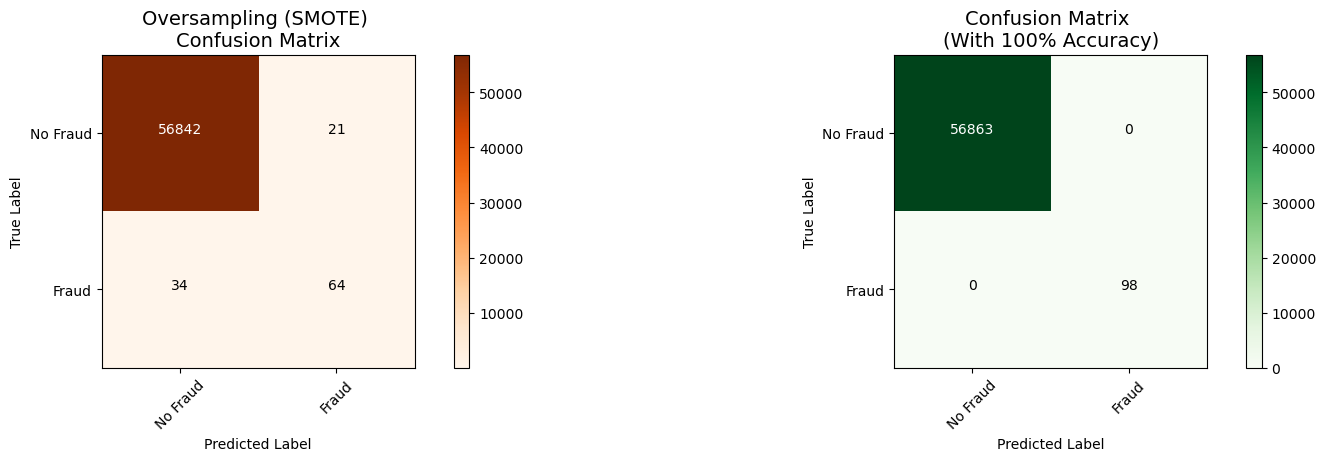

In [64]:
# Compute confusion matrices
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# Define class labels
labels = ['No Fraud', 'Fraud']

# Create a figure with the specified size
fig = plt.figure(figsize=(16, 8))

# Plot the confusion matrix for the SMOTE oversampled data
fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="Oversampling (SMOTE) \nConfusion Matrix", cmap=plt.cm.Oranges)

# Plot the confusion matrix for the ideal case with 100% accuracy
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n(With 100% Accuracy)", cmap=plt.cm.Greens)

### Conclusion:
Implementing SMOTE on our imbalanced dataset helped address the imbalance in our labels (more non-fraud than fraud transactions). However, it's important to note that sometimes the neural network on the oversampled dataset predicts fewer correct fraud transactions than our model using the undersampled dataset. This discrepancy could be influenced by several factors, including the removal of outliers, which was implemented only on the random undersample dataset and not on the oversampled one.

In the undersample dataset, our model struggles to correctly identify a large number of non-fraud transactions, often misclassifying them as fraud cases. This misclassification can have significant real-world consequences. For instance, customers making legitimate purchases might have their cards blocked due to being wrongly classified as fraud, leading to increased customer complaints and dissatisfaction. Such outcomes are detrimental to financial institutions, as they can damage customer trust and loyalty.

### Bias and Ethics Considerations:
The issues highlighted above also underscore the importance of addressing bias and ethical considerations in machine learning models, especially in sensitive areas like financial fraud detection. Bias in data or modeling techniques can lead to unfair treatment of certain groups or individuals. For example, an oversampling technique might inadvertently create synthetic data that introduces new biases, or the undersampling method might lose critical information about minority classes, both of which could skew model predictions.

Ethically, it's crucial to ensure that models do not disproportionately harm any group of users. Financial institutions must balance the need for fraud detection with the potential negative impacts on customers, ensuring that the system is fair and transparent. Regular audits, bias assessments, and feedback loops should be implemented to identify and mitigate any unfair practices.

### Next Steps:
The next step in this analysis will be to apply outlier removal to our oversampled dataset and observe whether this improves accuracy on the test set. This approach aims to refine the model further and mitigate misclassifications, ultimately leading to better performance and fairness in fraud detection.